# Quantum dimension of machine learning 

*~ QubitFreaks*

---

[Abstrakt tutorialu o uczeniu maszynowym, wstęp]

# 🛫 Getting started
## 🛒 Install requirements from a file 

In [ ]:
!pip install -r ./requirements.txt

## 📃 Generate a sample data for training and testing

In [7]:
# Imports for data loader & vizualizations 
from sklearn.datasets import make_moons

# Randomly choosen number to init randomness
random_seed = 1829

X, y = make_moons(
    n_samples=200, # Defining number of samples to generate
    noise=.08, # Noise is the value of how much points will be scattered on graph 
    random_state=random_seed
)

# Print shapes of generated datasets
X.shape, y.shape

((200, 2), (200,))

#### `X`:
We just generated **200** `samples` (arrays), each with **two** values. The both values of every `sample` represent thier one distinguishing feature. It's stored in `X` variable.
#### `y`:
`y` is array of {`0`, `1`} values (like: `[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]`) which determinate to which class belong every sample from X. (With the same order)

Let's graph that data 📊:

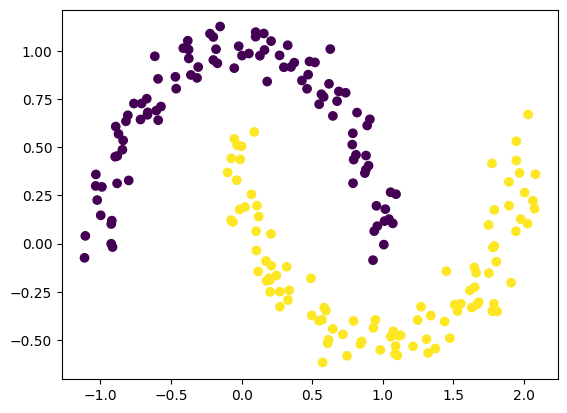

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.scatter(X[:,0], X[:,1], c=y)

We can do that by "drawing" a line between these two groups of points. 

Here is classic and basic method for that called **linear regression**. It's implemented in SVC classical alghoritm (nothing from quantum computing yet)

<Axes: >

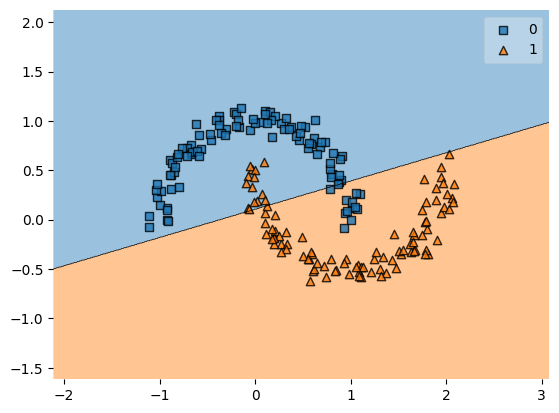

In [13]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

svc = SVC(kernel='linear', C=100)
svc.fit(X, y)
plot_decision_regions(X, y, svc)